In [261]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import normaltest

def add_mean_median_annotations(ax, data):
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    ax.axvline(mean_val, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='red', linestyle='solid', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend()



# Business Understanding

Airbnb is a marketplace connecting hosts and guests. Hosts are individuals who provide accommodations, while guests are those who rent these accommodations. Airbnb's revenue comes from host fees and guest fees. Host fees are charged to hosts who have listed their properties and have them rented by guests. Guest fees are charged to guests who rent the accommodations.

Airbnb operates with a flexible, asset-light business model, as it does not own the properties listed on its marketplace. Instead, these accommodations are owned by individuals who wish to rent them out (hosts). **This indicates that Airbnb's success relies on its ability to attract new hosts and retain existing ones.**

Probelem Statement:
- Recently, many hosts have started creating their own websites to rent out their properties ([link](https://www.cnbc.com/2020/05/06/airbnb-hosts-are-building-their-own-direct-booking-websites-in-revolt.html)), bypassing Airbnb as the rental platform despite listing their properties on Airbnb. This trend is attributed to dissatisfaction with Airbnb's programs, resulting in a loss of potential revenue for the company.
- Airbnb aims to continuously increase the number of properties listed on its app to sustain its business.
- Airbnb plans to leverage Bangkok's appeal as a top tourist destination ([link](https://www.liputan6.com/lifestyle/read/4056210/bangkok-kembali-duduki-peringkat-pertama-kota-tujuan-turis-di-dunia)) to boost transactions on its platform.

Purpose:

Therefore, Airbnb seeks insights into host behavior based on the characteristics of listed properties. This information can be used to develop new programs tailored to better retain existing hosts and attract potential new hosts.

# Data Understanding

In [262]:
df = pd.read_csv('Capstone Project M2 Airbnb Listings Bangkok.csv', index_col=0)
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0


This dataset contains information about the characteristics of properties listed by Airbnb hosts in Bangkok, with each row representing a property listed by a host.

Feature:
1. id = unique identifier for the property
1. name = property name
1. host_id = unique identifier for the host
1. host_name = host name
1. neighbourhood = district where the Airbnb is located
1. latitude = neighbourhood location
1. longitude = neighbourhood location
1. room_type = type of Airbnb (Entire home, Private room,Shared room, Hotel)
1. price = rental price (baht)
1. minimum_nights = minimum stay requirement 
1. number_of_reviews =  total number of reviews received
1. last_reviws = date of the last review
1. reviews_per_month = number of reviews per month
1. calculated_host_listing_count = total number of properties listed by the host
1. availability_365 = number of days the property is available for rent in a year
1. number_of_reviews_ltm = number of reviews in the last 12 months


## Data Type

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

It can be observed that the dataset comprises 15,854 rows and 16 columns. There is an error in the data type of the `last_review variable`, which should be of the datetime type.

## Empty Data

In [264]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [265]:
empty = ['name','last_review', 'reviews_per_month']

for i in empty:
    proporsi = (len(df[df[i].isna()])/len(df)*100)
    print(f'The proportion of missing values in the variables {i} is {round(proporsi,2)}%')

The proportion of missing values in the variables name is 0.05%
The proportion of missing values in the variables last_review is 36.52%
The proportion of missing values in the variables reviews_per_month is 36.52%


The missing data in the property name variable has a very small proportion. The proportions of missing data in the `last_review` and `reviews_per_month` variables are identical, which is quite suspicious.

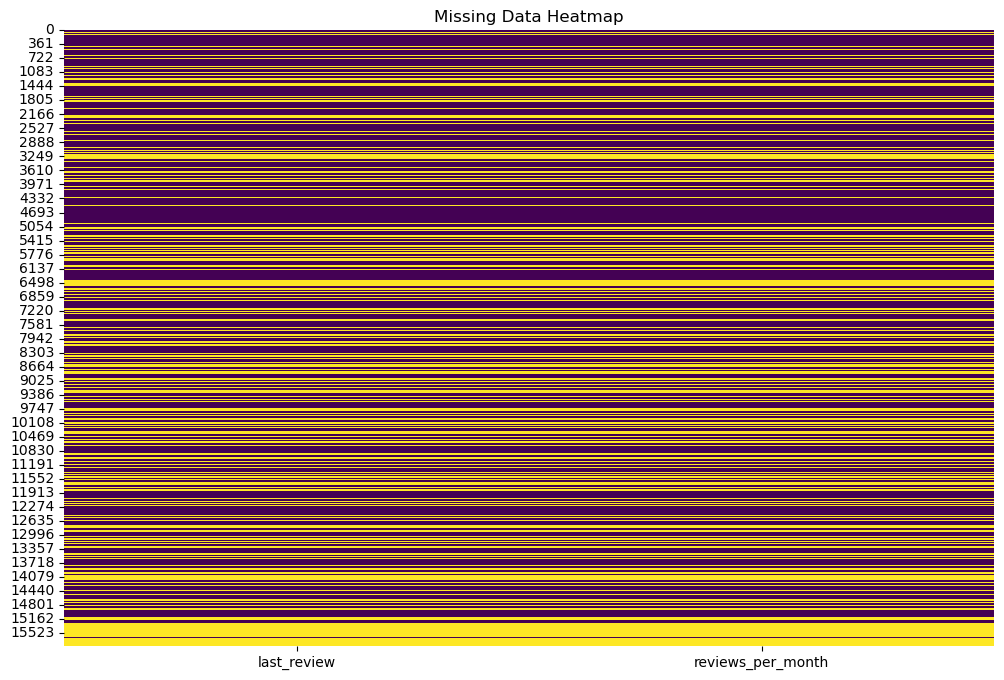

In [266]:
check = df[['last_review', 'reviews_per_month']]
plt.figure(figsize=(12, 8))
sns.heatmap(check.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

Upon further examination, it was found that the missing data in both variables exhibit a pattern. Therefore, it is necessary to investigate them in relation to other review-related variables.

In [267]:
df[df['reviews_per_month'].isna() & df['last_review'].isna()]['number_of_reviews'].sum()

0

Upon investigation, it was found that these variables are empty because the properties have never received any reviews.

*based on the `number_of_reviews` variable

## Data Format

In [268]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 20)

rekap = pd.DataFrame()
kolom = []
jmlh = []
value = []
angka = 0


for i in df.columns:
    angka += 1
    kolom.append(i)
    jmlh.append(df[i].nunique())
    value.append(df[i].unique())
    
    if angka == len(df.columns):
        rekap['Kolom'] = kolom
        rekap['Jumlah Unique'] = jmlh
        rekap['Unique'] = value

rekap

,Kolom,Jumlah Unique,Unique
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 bed 2 bath, BTS, 


The `calculated_host_listings`_count variable contains information about the number of listings a host has, which can be derived by grouping the data by the `host_id` variable.

## Duplicate Data

In [269]:
df.duplicated().sum()

0

## Descriptive Statistics

In [270]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000



The minimum value of the price variable is zero. However, it is not feasible for a property to be rented for free, so this issue needs to be addressed.

In [271]:
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


In [272]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15854,15854,15854,10064
unique,14794,5313,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


## Outlier

In [273]:
numerikal = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

rekap = pd.DataFrame()
kolom = []
Q1 = []
Q3 = []
IQR = []
jmlh = []
angka = 0

# looping untuk IQR setiap variabel numerik
for i in numerikal.columns:
    angka += 1
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1

    batas_bawah = q1 - 1.5*iqr
    batas_atas = q1 + 1.5*iqr

    hasil = numerikal[(numerikal[i] < batas_bawah) | (numerikal[i] > batas_atas) ]
    hitung = len(hasil)

    kolom.append(i)
    Q1.append(q1)
    Q3.append(q3)
    IQR.append(iqr)
    jmlh.append(hitung)
    
    if angka == len(numerikal.columns):
        rekap['Kolom'] = kolom
        rekap['Q1'] = Q1
        rekap['Q3'] = Q3
        rekap['IQR'] = IQR
        rekap['Jumlah Outlier'] = jmlh


    
rekap.sort_values('Jumlah Outlier', ascending=False)

,Kolom,Q1,Q3,IQR,Jumlah Outlier
1,minimum_nights,1.00,7.00,6.00,3597
2,number_of_reviews,0.00,13.00,13.00,3212
6,number_of_reviews_ltm,0.00,3.00,3.00,3207
4,calculated_host_listings_count,1.00,13.00,12.00,3197
0,price,900.00,2429.00,1529.00,2645
3,reviews_per_month,0.12,1.06,0.94,1676
5,availability_365,138.00,360.00,222.00,0


In [274]:
rekap['proporsi'] = (rekap['Jumlah Outlier']/len(df))*100
rekap

,Kolom,Q1,Q3,IQR,Jumlah Outlier,proporsi
0,price,900.00,2429.00,1529.00,2645,16.683487
1,minimum_nights,1.00,7.00,6.00,3597,22.688281
2,number_of_reviews,0.00,13.00,13.00,3212,20.259871
3,reviews_per_month,0.12,1.06,0.94,1676,10.571465
4,calculated_host_listings_count,1.00,13.00,12.00,3197,20.165258
5,availability_365,138.00,360.00,222.00,0,0.000000
6,number_of_reviews_ltm,0.00,3.00,3.00,3207,20.228334


## Distribution

In [275]:
rekap = pd.DataFrame()
kolom = []
hasil = []
angka = 0

# looping untuk pengujian distribusi 
for i in numerikal.columns:
    
    angka += 1
    kolom.append(i)

    dp_statistic, dp_pvalue = normaltest(df[i])

    if dp_pvalue > 0.05 :
        a = 'So, we assume a normal distribution'
        hasil.append(a)
    else :
        b = 'So, we dont assume a normal distribution'
        hasil.append(b)

    if angka == len(numerikal.columns):
        rekap['Kolom'] = kolom
        rekap['hasil'] = hasil

rekap   

,Kolom,hasil
0,price,"So, we dont assume a normal distribution"
1,minimum_nights,"So, we dont assume a normal distribution"
2,number_of_reviews,"So, we dont assume a normal distribution"
3,reviews_per_month,"So, we dont assume a normal distribution"
4,calculated_host_listings_count,"So, we dont assume a normal distribution"
5,availability_365,"So, we dont assume a normal distribution"
6,number_of_reviews_ltm,"So, we dont assume a normal distribution"


**Summary**

- Data Type
<br>
There is an error in the data type of the `last_review variable`, which should be of the datetime type.

- Empty Data
<br>
The `last_review` and `reviews_per_month` variables have the same proportion of missing data, which is 36.5208% (5790 missing entries). The missing data is due to the properties not having any reviews, so it does not need to be removed. This can be observed from the `number_of_reviews` variable, which has a value of zero. The missing data in the `last_review` variable needs to be addressed by changing the missing entries to the default value of 1999-01-01. Similarly, the `reviews_per_month` variable needs to be addressed by changing the missing entries to zero (default value).

- Data Format
<br>
1. The value of the `calculated_host_listings_count` variable can be derived by grouping the `host_id` variable. Therefore, the `calculated_host_listings_count` variable can be removed.
<br>
1. Some data in the name and host_name variables contain icon symbols

- Duplicate
<br>
No duplicate data was found.

- Descriptive Statistics
<br>
A finding in the `price` variable shows that the minimum value is zero. This is not feasible, as a rental property must have a rental price. Therefore, this issue needs to be addressed by removing the rows with a zero value in the `price` variable.

- Distribution
<br>
All numerical variables do not follow a normal distribution, likely due to the presence of many outliers.

# Data Preparation

Changing the data type of the `last_review variable`

In [276]:
df['last_review'] = pd.to_datetime(df['last_review'])

Removing missing data in the `name` variable

In [277]:
df = df.drop(df[(df['name'].isnull()) & (df['name'].isnull())].index)


Changing missing data in the `last_review` variable to 1999-01-01

In [278]:
date_val = pd.to_datetime('1999-01-01')
df['last_review'] = df['last_review'].fillna(date_val)

Changing missing data in the reviews_per_month variable to zero

In [279]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


Removing data in the price variable that has a value of 0

In [280]:
df = df[df['price'] > 0]

- Addressing icon symbols in the name and host_name variables by creating a new dataframe without these variables, as they can be represented by the id and host_id variables.
- Addressing the calculated_host_listings_count variable because its information can be derived by grouping the host_id variable.

In [281]:
df2 = df.drop(['name','host_name','calculated_host_listings_count'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15845 entries, 0 to 15853
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     15845 non-null  int64         
 1   host_id                15845 non-null  int64         
 2   neighbourhood          15845 non-null  object        
 3   latitude               15845 non-null  float64       
 4   longitude              15845 non-null  float64       
 5   room_type              15845 non-null  object        
 6   price                  15845 non-null  int64         
 7   minimum_nights         15845 non-null  int64         
 8   number_of_reviews      15845 non-null  int64         
 9   last_review            15845 non-null  datetime64[ns]
 10  reviews_per_month      15845 non-null  float64       
 11  availability_365       15845 non-null  int64         
 12  number_of_reviews_ltm  15845 non-null  int64         
dtypes

# Data Analysis
The data analysis process will be conducted using several characteristic approaches.

## Host

In [282]:
host = pd.DataFrame(data=df2.groupby('host_id').count()['id']).reset_index().sort_values(by='id', ascending=False)
host.head(3)

,host_id,id
4483,201677068,228
2152,52161947,99
1132,26736483,89


- How many hosts have listed their properties on Airbnb?

In [283]:
host['host_id'].nunique()

6651

- The distribution of property ownership.

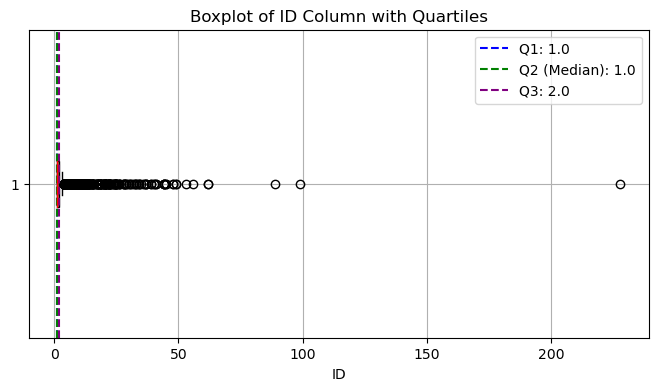

In [284]:
quartiles = host['id'].quantile([0.25, 0.5, 0.75])
Q1 = quartiles[0.25]
Q2 = quartiles[0.5] 
Q3 = quartiles[0.75]

plt.figure(figsize=(8, 4))
plt.boxplot(host['id'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='sandybrown', color='black'),
            medianprops=dict(color='red'))

plt.axvline(Q1, color='blue', linestyle='--', label=f'Q1: {Q1}')
plt.axvline(Q2, color='green', linestyle='--', label=f'Q2 (Median): {Q2}')
plt.axvline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3}')

plt.title('Boxplot of ID Column with Quartiles')
plt.xlabel('ID')
plt.grid(True)
plt.legend()
plt.show()

The first quartile (Q1) and the median (Q2) are both at the same value, which indicates that at least 50% of the hosts have a very low number of properties (likely just one). This suggests that the majority of hosts on Airbnb are small-scale, possibly individual hosts managing a single property. These hosts are likely treating Airbnb as a supplemental income source rather than a primary business.

The third quartile (Q3) is slightly higher, which indicates that another significant portion of hosts has a few more properties, but still not many. This middle group might be hosts who are expanding their Airbnb presence, perhaps by managing 2-3 properties. These hosts could be experimenting with scaling their operations but are not yet operating at a large scale.

The boxplot shows that the range between Q3 and the maximum values has a larger spread, indicating that a small number of hosts manage a significantly higher number of properties. These hosts are likely professional property managers or businesses using Airbnb as a platform to manage a large portfolio of properties.

Since it is not suitable to grouping host behavior based on quartile values, the grouping will be categorized as follows:

- 1-2: Individual Hosts (most common hosts who manage one or two properties)
- 3-10: Semi-Professional Hosts (hosts who might be operating as a small business)
- 11+: Professional Hosts (hosts who manage large portfolios and may have a full-fledged business)


In [285]:
def assign_cluster(id_value):
    if id_value <= 2:
        return 'Individual Hosts'
    elif 3 <= id_value <= 10:
        return 'Semi-Professional Hosts'
    else:
        return 'Professional Hosts'

host['Host_Type'] = host['id'].apply(assign_cluster)

host['Host_Type'].value_counts()

Individual Hosts           5428
Semi-Professional Hosts    1026
Professional Hosts          197
Name: Host_Type, dtype: int64

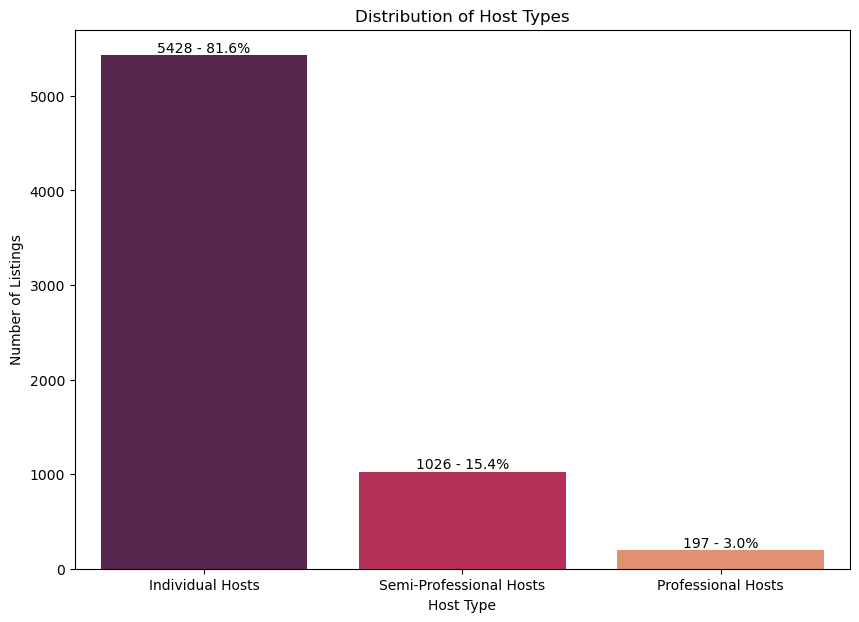

In [286]:
total_count_type = host['Host_Type'].value_counts().sum()

plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Host_Type', data=host, order=host['Host_Type'].value_counts().index, palette='rocket')
plt.title('Distribution of Host Types')
plt.xlabel('Host Type')
plt.ylabel('Number of Listings')

for patch in ax.patches:
    height = patch.get_height()
    percentage = f'{(height / total_count_type) * 100:.1f}%'
    ax.text(patch.get_x() + patch.get_width() / 2, height, 
            f'{int(height)} - {percentage}', 
            ha='center', va='bottom')
        
plt.show()

**Dominance of Individual Hosts**

The majority of Airbnb hosts (81.6%) are categorized as "Individual Hosts," which means they typically manage only one or two properties. This indicates that most hosts are likely individuals or families who rent out their primary residence or a vacation home as a side activity. These hosts may not view Airbnb as a primary source of income but rather as a way to generate supplemental earnings.

**Moderate Presence of Semi-Professional Hosts**

A smaller segment, 15.4% of hosts, falls into the "Semi-Professional Hosts" category. These hosts manage a few more properties, typically between three to ten listings. This group is likely made up of hosts who are more serious about using Airbnb as a business opportunity, potentially as a secondary income source or a small-scale rental business.

**Small Percentage of Professional Hosts**

Only 3.0% of hosts are "Professional Hosts," managing a large number of properties. These hosts likely operate as full-time property managers or businesses with a significant investment in short-term rentals. They might be more focused on scaling their operations, optimizing occupancy rates, and maximizing revenue.

### Recommendation

**Support and Empower Individual Hosts:**

Given that individual hosts make up the vast majority, Airbnb should focus on creating tailored resources and tools that help these hosts succeed. This could include offering easy-to-use pricing tools, guest communication templates, and guides on how to optimize their listings.

**Encourage Growth for Semi-Professional Hosts:**

Semi-professional hosts are likely on the path to scaling their operations. Airbnb could offer incentives for these hosts to expand their property portfolio, such as discounts on professional photography, bulk listing management tools, or access to premium features like dynamic pricing. Connect semi-professional hosts with more experienced professional hosts through mentorship programs, enabling them to learn how to effectively manage multiple properties and scale their business.

**Provide Advanced Tools for Professional Hosts:**

Professional hosts require more sophisticated tools to manage their large portfolios efficiently. Airbnb should offer features like bulk listing management, integration with property management systems, and advanced analytics to help these hosts optimize their operations.

Foster a sense of community among hosts by creating forums, local meetups, or online groups where hosts can share experiences, advice, and support each other. This is especially important for individual and semi-professional hosts who might benefit from peer support and shared knowledge. Recognize and reward hosts who consistently receive positive reviews, maintain high occupancy rates, or contribute to the community by sharing their knowledge. This could be in the form of badges, additional visibility on the platform, or even financial incentives.

Develop marketing strategies that cater to the specific needs of each host type. For example, Airbnb could promote individual hosts as offering unique, personal experiences, while positioning professional hosts as offering consistent, high-quality stays.

## Region

- Bangkok has a total of 50 districts ([link](https://id.wikipedia.org/wiki/Daftar_distrik_Bangkok)). Does each district have an Airbnb listing?

In [287]:
df2['neighbourhood'].nunique()

50

Based on that, it can be seen that Airbnb listings are already distributed across all districts of Bangkok.

- Which district has the highest number of Airbnb listings?

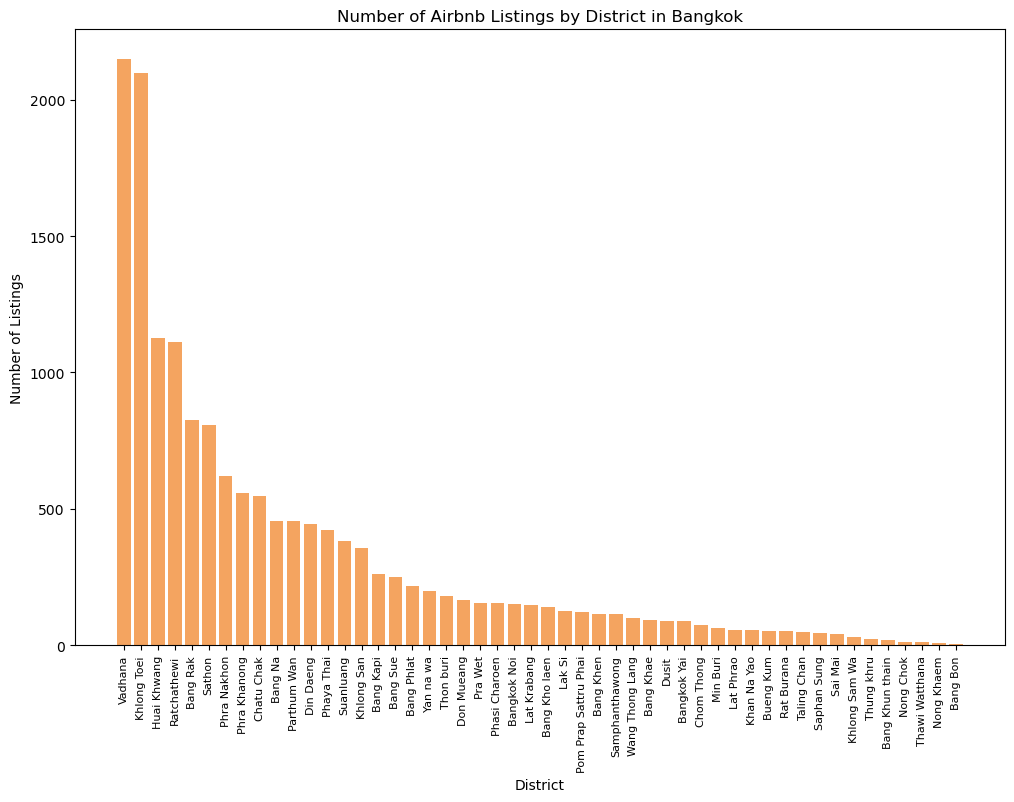

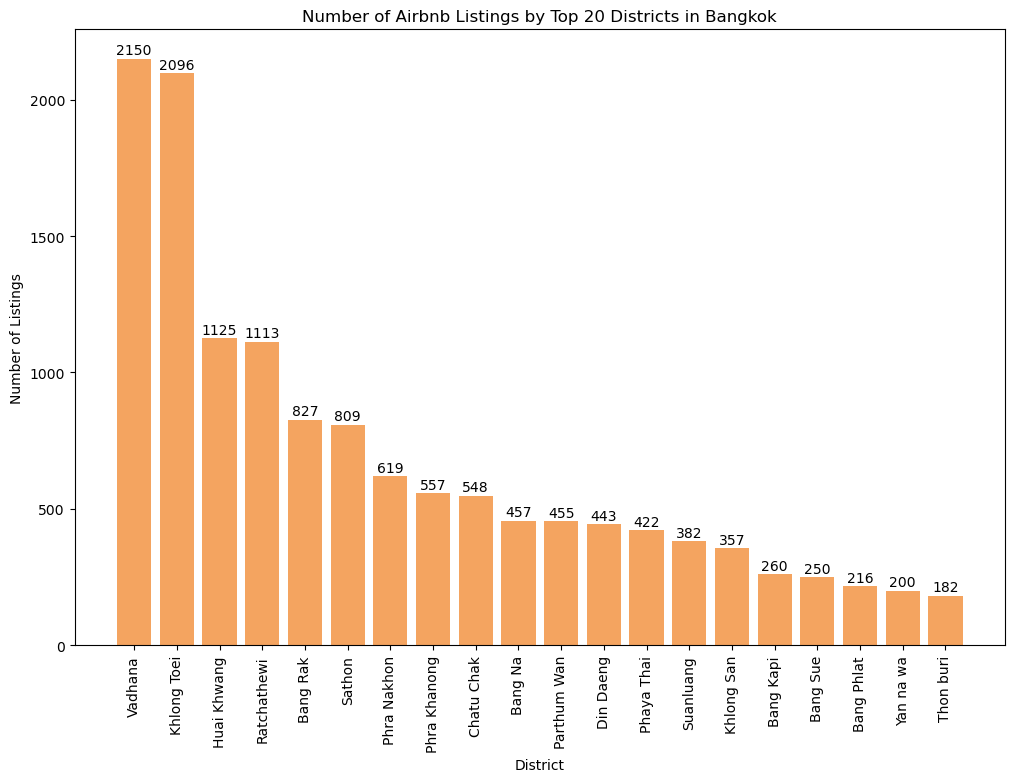

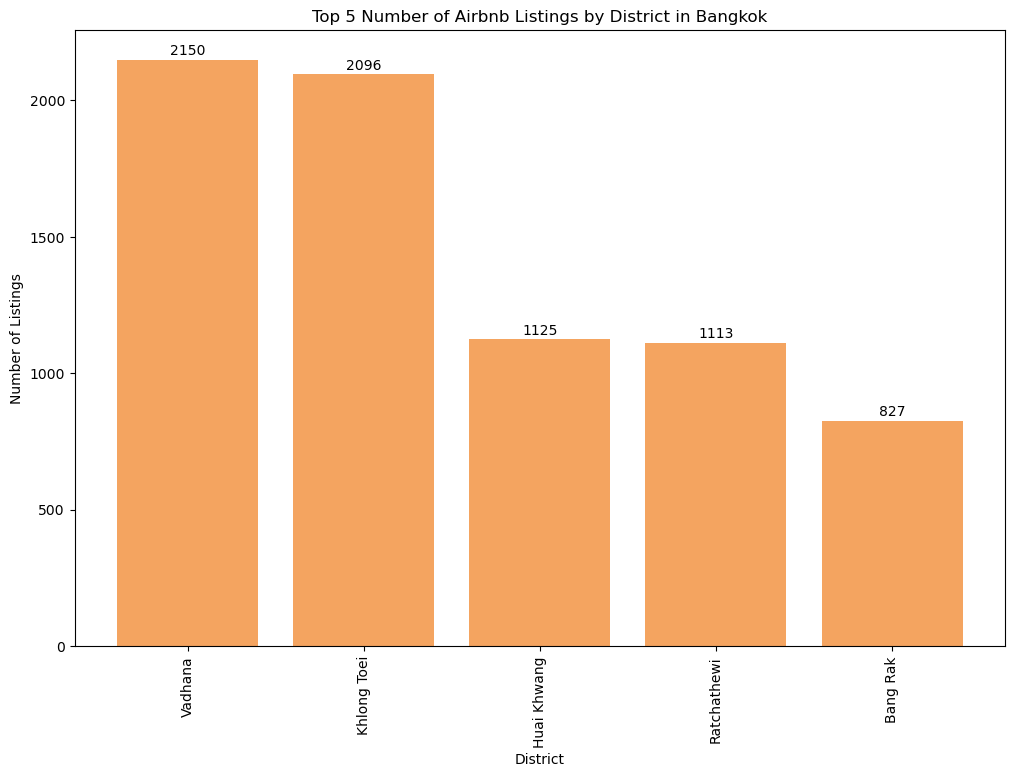

In [288]:
district = pd.DataFrame(data=df2.groupby('neighbourhood').count()['id']).reset_index().sort_values(by='id', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(district['neighbourhood'], district['id'], color='sandybrown')
plt.title('Number of Airbnb Listings by District in Bangkok')
plt.xlabel('District')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90, fontsize=8)
plt.show()


top_20 = district.head(20)

plt.figure(figsize=(12, 8))
bars = plt.bar(top_20['neighbourhood'], top_20['id'], color='sandybrown')
plt.title('Number of Airbnb Listings by Top 20 Districts in Bangkok')
plt.xlabel('District')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()

top_5 = district.head(5)

plt.figure(figsize=(12, 8))
plt.bar(top_5['neighbourhood'], top_5['id'], color='sandybrown')
plt.title('Top 5 Number of Airbnb Listings by District in Bangkok')
plt.xlabel('District')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)

for index, value in enumerate(top_5['id']):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.show()


The chart shows a clear concentration of Airbnb listings in a few key districts, with Vadhana and Khlong Toei being the most prominent. These districts have over 2000 listings each, indicating that they are major hotspots for Airbnb in Bangkok.


The other top districts include Huai Khwang, Ratchathewi, and Bang Rak, though the number of listings drops significantly compared to the top two districts.

The visualizations highlight that Vadhana and Khlong Toei are the top-performing districts in terms of the number of Airbnb listings, each boasting over 2000 listings. These districts are evidently crucial markets for Airbnb, indicating a strong guest preference and high demand in these areas.

The districts outside the top 5 have significantly fewer listings. This suggests there may be untapped potential in these areas, especially if they offer unique attractions or are well-connected by public transportation. These could be targeted for growth if demand trends shift or if marketing efforts are made to promote these areas as viable alternatives to more central locations.

The visualizations highlight that Vadhana and Khlong Toei are the top-performing districts in terms of the number of Airbnb listings, each boasting over 2000 listings. These districts are evidently crucial markets for Airbnb, indicating a strong guest preference and high demand in these areas.

In [289]:
bangkok = r'Bangkok-districts.geojson'

fig = px.choropleth_mapbox(district, geojson=bangkok, color='id', color_continuous_scale='Spectral',
                           locations='neighbourhood', featureidkey='properties.dname_e',
                           center={'lat': 13.7563, 'lon': 100.5018},
                           mapbox_style='carto-positron', zoom=9,
                           labels={'id':'Total Listing',
                                    'neighbourhood': 'Distirct'})

fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})

fig.show()

Airbnb properties in Bangkok are concentrated in the central part of the city, with a significantly higher number compared to other areas, indicating high demand and popularity of central locations among travelers.

These  top 5 districts are likely popular due to their central locations, access to amenities, and tourist attractions.

### Recommendation

focusing on districts like Vadhana, Khlong Toei, and Huai Khwang might yield higher occupancy rates due to their established popularity. Enhancing the quality of listings and adding competitive amenities in these districts could help maintain or increase market share.

Airbnb should use the insights from the geographical data to identify emerging districts that could benefit from increased listings. Districts with new infrastructure projects or growing tourist attractions should be targeted for future expansion efforts.

To balance the distribution of listings and reduce pressure on central areas, Airbnb could consider promotional campaigns to highlight the attractions and benefits of staying in lesser-known districts. Offering incentives to hosts in these areas, such as reduced fees or marketing support, could help encourage growth in these regions.

- Median Price for each district

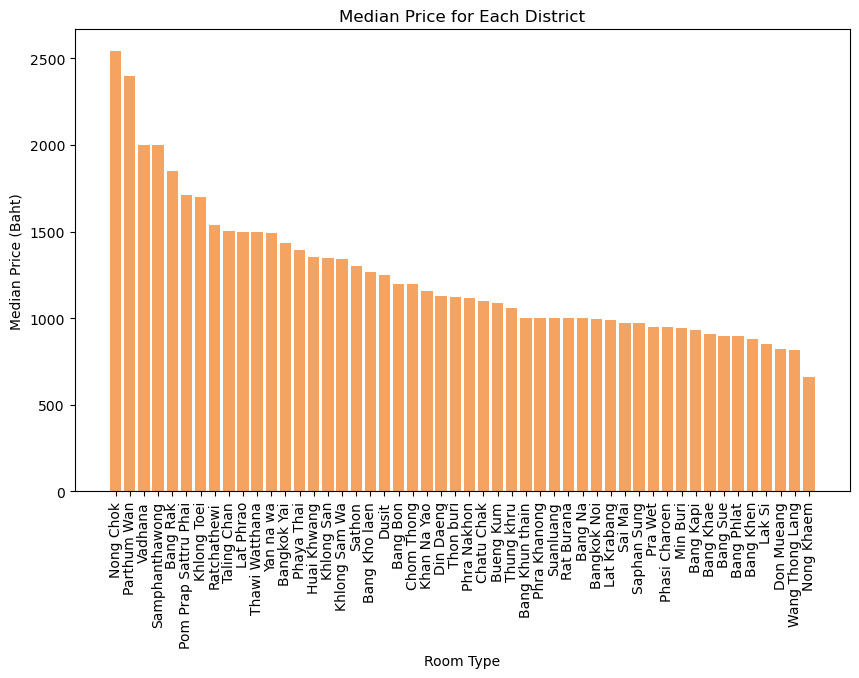

In [290]:
median_price_per_district = df2.groupby('neighbourhood')['price'].median().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(median_price_per_district['neighbourhood'], median_price_per_district['price'] ,color='sandybrown')
plt.title('Median Price for Each District')
plt.xlabel('Room Type')
plt.xticks(rotation=90)
plt.ylabel('Median Price (Baht)')
plt.show()

Although the Nong Chok district has 14 Airbnb listings, it has the highest rental prices compared to other districts. This indicates a potentially higher value or exclusivity of the listings in this area.

Several districts have similar median prices, clustering around the mid-range values, suggesting these areas may have more competition and a variety of listing types.

Districts like Wang Thong Lang, Nong Khaem, and Don Mueang have the lowest median rental prices. This could indicate either a higher supply of more affordable accommodations or less demand for these areas.

- Median Avaibility per Each District

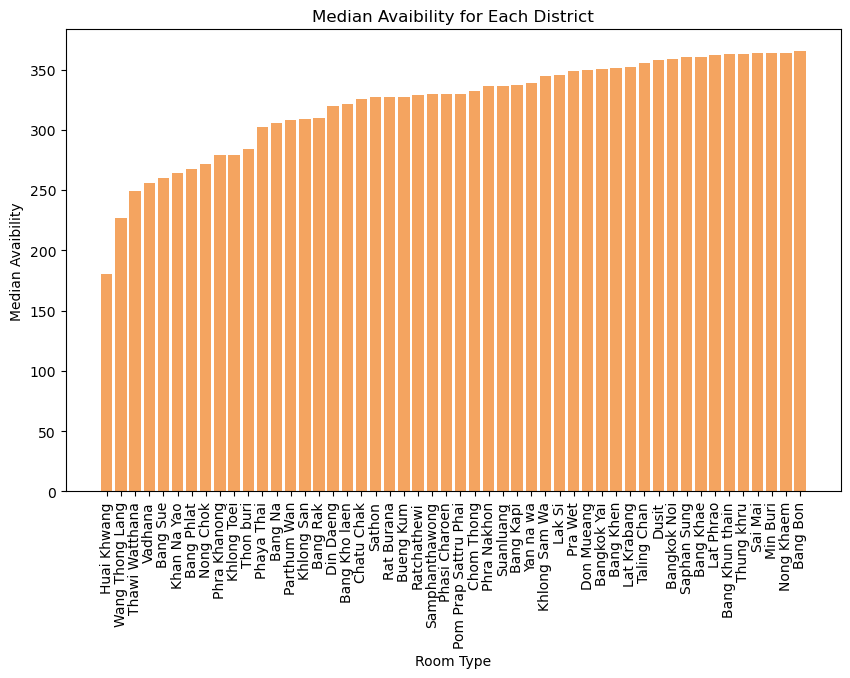

In [291]:
median_aviability_per_district = df2.groupby('neighbourhood')['availability_365'].median().reset_index().sort_values(by='availability_365', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(median_aviability_per_district['neighbourhood'], median_aviability_per_district['availability_365'] ,color='sandybrown')
plt.title('Median Avaibility for Each District')
plt.xlabel('Room Type')
plt.xticks(rotation=90)
plt.ylabel('Median Avaibility')
plt.show()

Neighborhoods with lower availability are likely more in demand or fewer listings, indicating potential areas for price optimization and marketing efforts to boost occupancy in less busy areas.


- Median reviews per Each District

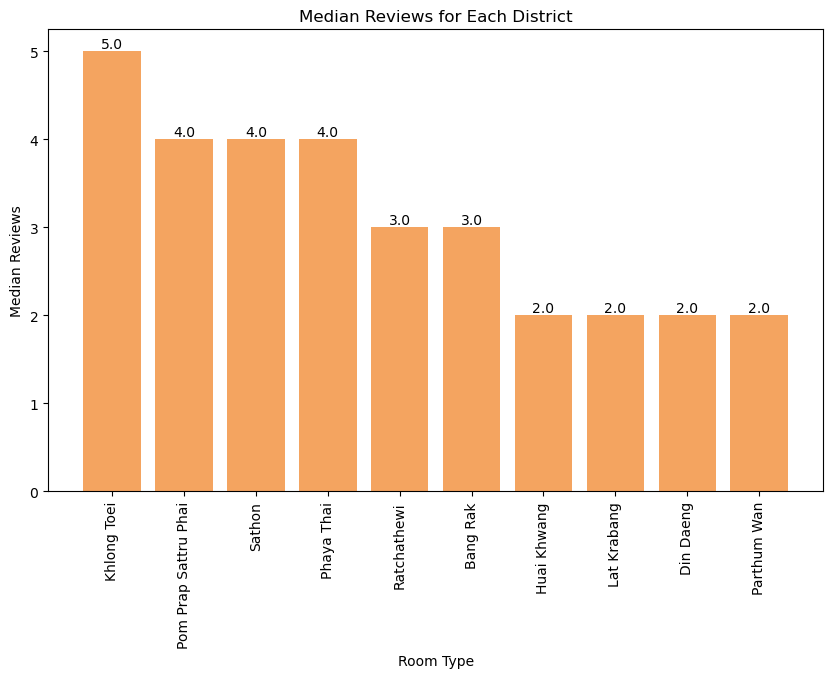

In [292]:
median_rev_per_district = df2.groupby('neighbourhood')['number_of_reviews'].median().reset_index().sort_values(by='number_of_reviews', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(median_rev_per_district['neighbourhood'], median_rev_per_district['number_of_reviews'] ,color='sandybrown')
plt.title('Median Reviews for Each District')
plt.xlabel('Room Type')
plt.xticks(rotation=90)
plt.ylabel('Median Reviews')

for index, value in enumerate(median_rev_per_district['number_of_reviews']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

The neighborhoods with the highest average number of reviews are likely the most popular among guests. These areas can be used as benchmarks to understand what makes listings in these neighborhoods more appealing.

### Recommendation

For districts with high median prices, Airbnb could explore marketing strategies that highlight the unique features justifying these prices, such as exclusivity or proximity to key attractions. Ensuring that the premium pricing is matched with premium guest experiences will be crucial to maintaining high occupancy rates.

In districts with lower prices, Airbnb could consider promoting these as budget-friendly options or targeting longer stays, which could attract different traveler segments such as digital nomads or families on extended vacations.

In districts with high availability, Airbnb could work with hosts to explore dynamic pricing strategies that adjust rates based on demand fluctuations. Additionally, promotional campaigns could be implemented to boost bookings during off-peak seasons.

In high-demand areas with lower availability, Airbnb could encourage hosts to increase availability during peak tourist seasons to capitalize on the high occupancy potential.

## Room Type

In [293]:
custom_palette = {
    'Entire home/apt': '#FF6347',  
    'Hotel room': '#4682B4',  
    'Private room': '#32CD32',  
    'Shared room': '#FFD700',   
}

- What type of accommodation is listed the most?

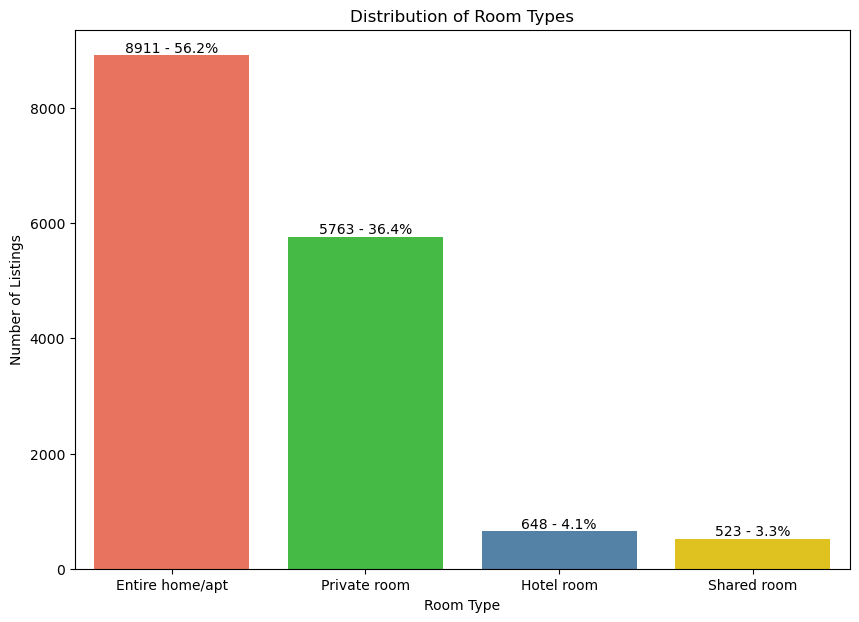

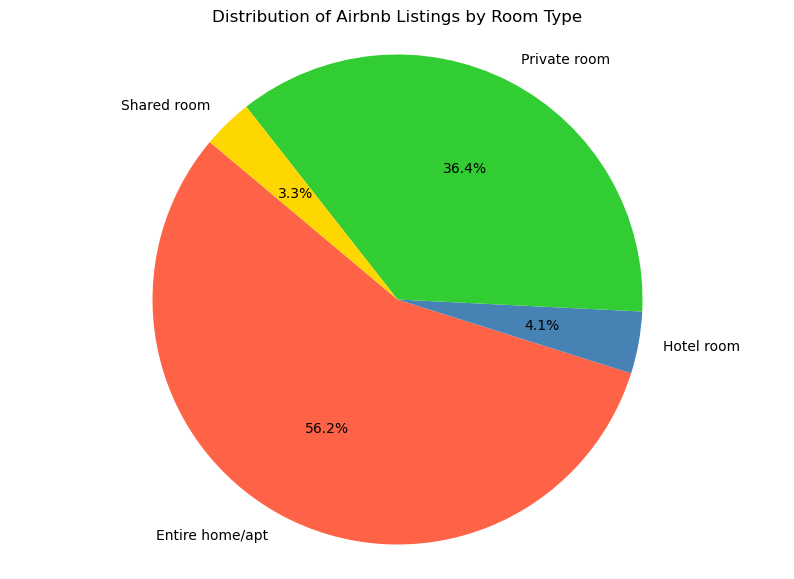

In [294]:
room_type = pd.DataFrame(data=df2.groupby('room_type').count()['id']).reset_index()
total_count = df2['room_type'].value_counts().sum()

plt.figure(figsize=(10, 7))
ax = sns.countplot(x='room_type', data=df2, palette= custom_palette)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')

for patch in ax.patches:
    height = patch.get_height()
    percentage = f'{(height / total_count) * 100:.1f}%'
    ax.text(patch.get_x() + patch.get_width() / 2, height, 
            f'{int(height)} - {percentage}', 
            ha='center', va='bottom')
        
plt.show()

plt.figure(figsize=(10, 7))
plt.pie(room_type['id'], labels=room_type['room_type'], autopct='%1.1f%%', startangle=140, colors=custom_palette2)
plt.title('Distribution of Airbnb Listings by Room Type')
plt.axis('equal')
plt.show()


fig = px.scatter_mapbox(
    df2,
    lat="latitude",
    lon="longitude",
    color="room_type",
    mapbox_style="carto-positron",
    zoom=10,
    title="Scatter Plot of Airbnb Listings in Bangkok by Room Type",
    labels={'room_type': 'Room Type'},
    color_discrete_map=custom_palette)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


The fact that 56.2% of the listings in Bangkok are entire homes or apartments suggests that many hosts are targeting travelers who prefer privacy, such as families, groups, or long-term travelers. This can be a response to the demand from tourists who seek the comfort and convenience of having an entire property to themselves, which can include amenities like kitchens, multiple bedrooms, and living spaces.

36.4% of the listings are private rooms. This indicates that a considerable number of hosts are renting out individual rooms within their homes or apartments to solo travelers, couples, or those on a budget.

The low percentage (4.1%) of hotel room listings, mostly concentrated in central areas, highlights a niche market where Airbnb hosts compete with traditional hotels. These listings likely appeal to travelers who seek the familiarity of a hotel experience but prefer booking through the Airbnb platform.

Shared rooms represent a small portion (3.3%) of the market but can be an attractive option for the most budget-conscious travelers or those seeking a more social travel experience. These listings are also primarily located in central areas, indicating that even budget travelers prioritize proximity to key attractions.


Entire Home/Apt (orange): These listings are spread throughout the central area and beyond

Private Room (green): Private rooms also show significant presence, especially in the central districts, indicating a high demand for budget-friendly options where guests share the property with hosts or other guests.

Hotel Room (blue): Hotel room listings are fewer and primarily located in central Bangkok, likely around popular tourist and business areas.

Shared Room (yellow): Shared room listings are less common but still present in the central area, catering to budget travelers who do not mind sharing space with others.

### Recommendation

Promote entire home/apartment listings in marketing campaigns aimed at families, groups, or travelers seeking long-term stays. Highlight the privacy and space benefits compared to traditional hotel rooms.

Position private rooms as an affordable yet comfortable alternative to hotels, ideal for solo travelers or couples. Consider targeting marketing efforts toward younger, budget-conscious travelers or those looking for a more authentic, local experience.

Focus on promoting hotel room listings to business travelers or tourists looking for a familiar, no-frills stay in key central locations.  Consider expanding partnerships with hotels to increase the variety and availability of hotel rooms on the platform. This can attract guests who are loyal to hotels but appreciate the convenience of Airbnb's booking system.

Market shared rooms as the perfect option for ultra-budget travelers or those looking for a more communal, social travel experience. Emphasize the cost savings and the opportunity to meet other travelers.

- Median price for each room type

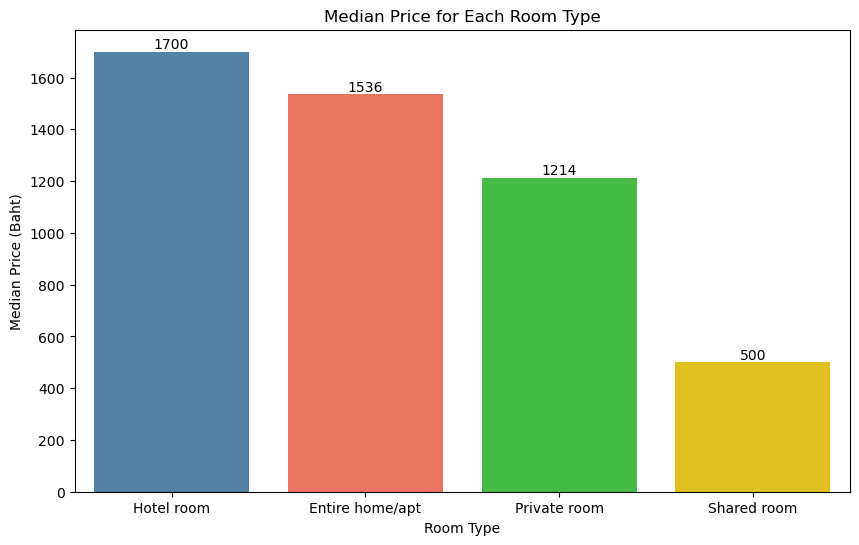

In [295]:
median_price_per_room_type = df2.groupby('room_type')['price'].median().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'room_type', y = 'price', data=median_price_per_room_type, palette=custom_palette)
plt.title('Median Price for Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Median Price (Baht)')

for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, height, int(height), 
                ha='center', va='bottom')
        
plt.show()


Hotel Room: The median price for hotel rooms is the highest at 1700 Baht, indicating that this room type is positioned as a premium offering. Guests booking hotel rooms on Airbnb are likely seeking a more traditional lodging experience, perhaps with added amenities and services, and are willing to pay more for it.

Entire Home/Apartment: Priced at 1536 Baht, entire homes or apartments are also in the higher pricing tier but slightly more affordable than hotel rooms. This room type caters to guests who value privacy, space, and a more home-like environment.

Private Room: With a median price of 1214 Baht, private rooms offer a more affordable alternative while still providing some level of privacy. This price point is likely appealing to solo travelers, couples, or those who prefer a more budget-friendly option within a shared living arrangement.

Shared Room: The lowest median price at 500 Baht suggests that shared rooms cater to the most budget-conscious travelers. These are likely popular among backpackers, students, or guests who are primarily focused on cost savings and are comfortable sharing spaces with others.

### Recommendation

Implement or enhance dynamic pricing tools that help hosts adjust their rates based on demand, seasonality, and competition. This will ensure that listings remain competitive across all room types.

- Median Availability per Room Type

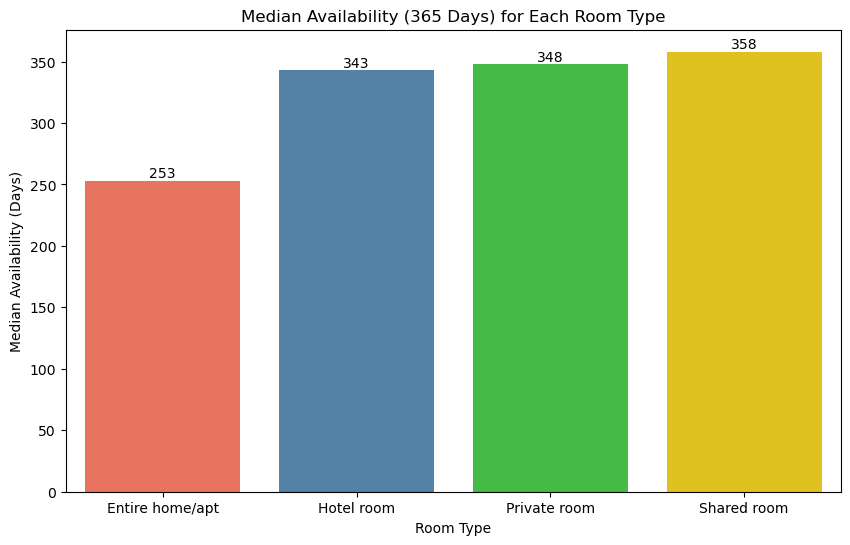

In [296]:
median_availability_per_room_type = df2.groupby('room_type')['availability_365'].median().reset_index().sort_values(by='availability_365', ascending=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x= 'room_type', y= 'availability_365', data=median_availability_per_room_type, palette=custom_palette)
plt.title('Median Availability (365 Days) for Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Median Availability (Days)')

for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, height, int(height), 
                ha='center', va='bottom')

plt.show()

The highest median availability is seen in shared rooms, with 358 days. This suggests that shared rooms are often available year-round, possibly due to lower demand compared to other room types.

With a median availability of 343 days, hotel rooms also show high availability, indicating that these listings are often ready for last-minute bookings. This aligns with the nature of hotel accommodations, where availability is generally high to cater to travelers who prefer the reliability of a hotel stay.

Private rooms have a median availability of 348 days, slightly higher than hotel rooms. This suggests that private rooms are similarly available throughout the year, appealing to travelers looking for a more personalized, yet affordable, accommodation option.

Entire Home/Apartment: The median availability for entire homes or apartments is 253 days, significantly lower than the other room types. This indicates higher booking rates for these listings, reflecting their popularity among travelers who value privacy and space, such as families and groups. The lower availability could be due to higher demand and longer booking durations.

### Recommendation

Given the lower availability of entire homes/apartments, which suggests higher demand, these listings should be highlighted in marketing efforts targeting families, groups, and long-term travelers. Consider promoting these properties during peak travel seasons when demand for more spacious accommodations is high.